In [2]:
from ligo import em_bright

In [3]:
from ligo.em_bright import em_bright
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
em_bright.source_classification(5, 1.4, 0, 0, 11)

(1.0, 0.025037371175510362, 0.48301698383458846)

In [5]:
#I did 1 because stop - step will give us our desired spin at 0.9 
#while setting stop at 0.9 will only give us a 0.8 spin
for chi1 in np.arange(0, 1, .1):
    system0 = em_bright.source_classification(5, 1.4, chi1, 0, 11)
    print(system0)
#mass1 = 5
#mass2 = 1.4
#chi1 (spin1) = 0 to 0.9
#chi2 (spin2) = 0
#SNR (signal to noise ratio) = 11
#has NS | has remnant | Has mass gap

(1.0, 0.025037371175510362, 0.48301698383458846)
(1.0, 0.055546081593870575, 0.47454901756372286)
(1.0, 0.36670505683583265, 0.40704603247763244)
(1.0, 0.5468828200201055, 0.42471518359691013)
(1.0, 0.7479058036621041, 0.42982667817630504)
(1.0, 0.9089756453581349, 0.47026128985780635)
(1.0, 0.9828846103883436, 0.48407225812978644)
(1.0, 1.0, 0.4904116690694779)
(1.0, 1.0, 0.5029733520959245)
(1.0, 1.0, 0.5069758410580555)


In [6]:
em_bright.source_classification(5, 1.4, 0, 0, 11)[0] #for finding has remnant

1.0

In [7]:
em_bright.source_classification(5, 1.4, 0, 0, 11)[1] #for finding neutron star

0.025037371175510362

In [300]:
em_bright.source_classification(5, 1.4, 0, 0, 11)[2] #last column, for has mass gap

0.48301698383458846

In [303]:
def mass_gaps(m1, m2, SNR):
    mass_gap_array = []
    chi1s = np.arange(0, 1, 0.1)
    for chi1 in chi1s:
        mass_gap_array.append(em_bright.source_classification(m1, m2, chi1, 0, SNR)[2])
    mass_gap_array = np.array(mass_gap_array)
    return (chi1s, mass_gap_array)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.48301698, 0.47454902, 0.40704603, 0.42471518, 0.42982668,
       0.47026129, 0.48407226, 0.49041167, 0.50297335, 0.50697584]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.        , 0.10361583, 0.16101689, 0.17011029, 0.15931465,
       0.04458292, 0.03782056, 0.03782056, 0.03782056, 0.03782056]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.        , 0.        , 0.00757499, 0.2947181 , 0.67442755,
       0.86193686, 0.84787202, 0.83731415, 0.65870409, 0.44323234]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.05168046, 0.03617533, 0.02933725, 0.03517921, 0.08389097,
       0.07880644, 0.06446029, 0.0983957 , 0.02973448, 0.02927294]))


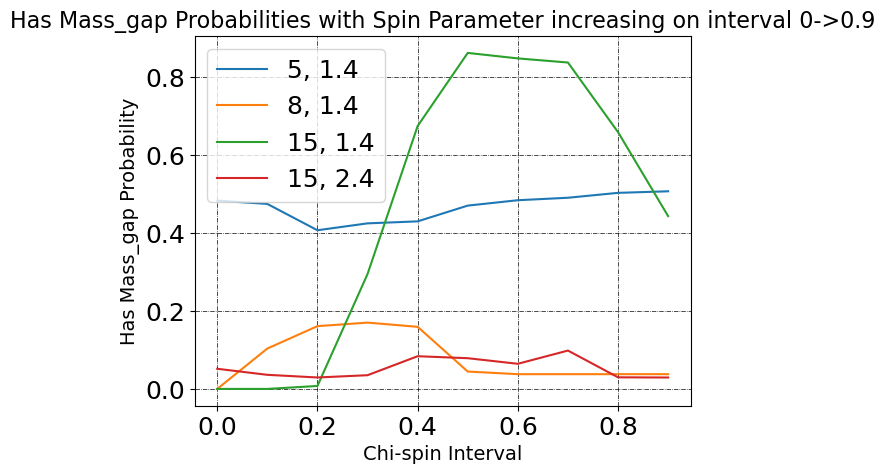

In [304]:
import matplotlib.pyplot as plt
chi, mass_gap1 = mass_gaps(5, 1.4, 11) #print each of mass_gaps values
chi, mass_gap2 = mass_gaps(8, 1.4, 11)
chi, mass_gap3 = mass_gaps(15, 1.4, 11)
chi, mass_gap4 = mass_gaps(15, 2.4, 11)

print(mass_gaps(5, 1.4, 11))
print(mass_gaps(8, 1.4, 11))
print(mass_gaps(15, 1.4, 11))
print(mass_gaps(15, 2.4, 11))

plt.plot(chi, mass_gap1, label='5, 1.4')
plt.plot(chi, mass_gap2, label='8, 1.4')
plt.plot(chi, mass_gap3, label='15, 1.4')
plt.plot(chi, mass_gap4, label='15, 2.4')
plt.title("Has Mass_gap Probabilities with Spin Parameter increasing on interval 0->0.9", fontsize=16)
plt.ylabel("Has Mass_gap Probability", fontsize=14)
plt.xlabel("Chi-spin Interval", fontsize=14)
plt.grid(which='major', color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

In [11]:
m11 = np.arange(0, 51, 10)
m22 = np.arange(0, 11, 1)
print(m11,"\n",m22)

[ 0 10 20 30 40 50] 
 [ 0  1  2  3  4  5  6  7  8  9 10]


In [12]:
# def mass_gaps(m1, m2, SNR):
#     system0_array = []
#     chi1s = np.arange(0, 1, 0.1)
#     for chi1 in chi1s:
#         system0_array.append(em_bright.source_classification(5, 1.4, chi1, 0, 11)[-1])
#     system0_array = np.array(system0_array)
#     return (chi1s, system0_array)

In [305]:
def has_remnant(m1, m2, SNR):
    has_remnant_array = []
    chi1s = np.arange(0, 1, 0.1)
    for chi1 in chi1s:
        has_remnant_array.append(em_bright.source_classification(m1, m2, chi1, 0, SNR)[1])
    has_remnant_array = np.array(has_remnant_array)
    return (chi1s, has_remnant_array)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.02503737, 0.05554608, 0.36670506, 0.54688282, 0.7479058 ,
       0.90897565, 0.98288461, 1.        , 1.        , 1.        ]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.00000000e+00, 2.64775587e-04, 1.38177957e-02, 2.47966595e-02,
       1.42710121e-01, 3.52245615e-01, 4.11936425e-01, 7.44766562e-01,
       9.11759062e-01, 9.25138109e-01]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0014576 , 0.05033648, 0.22908992, 0.42044327, 0.60863619]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.52581451e-06, 6.81220110e-05,
       7.29901055e-05, 8.31849510e-05]))


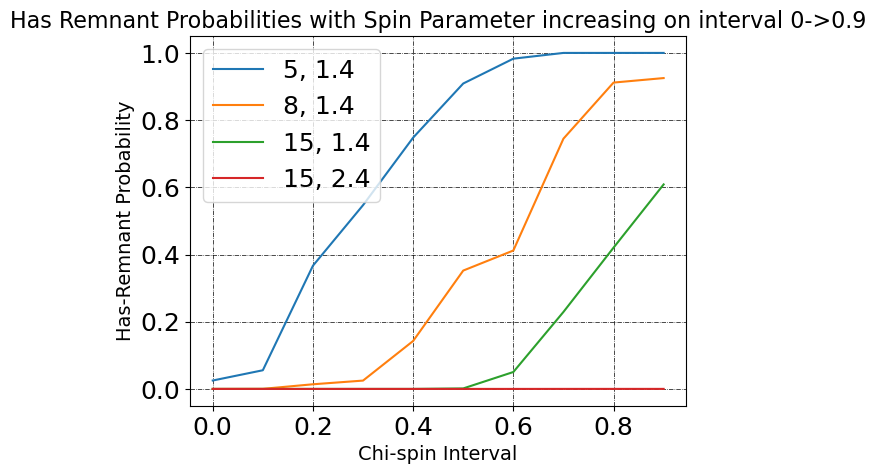

In [306]:
import matplotlib.pyplot as plt
chi, has_remnant1 = has_remnant(5, 1.4, 11) #print each of mass_gaps values
chi, has_remnant2 = has_remnant(8, 1.4, 11)
chi, has_remnant3 = has_remnant(15, 1.4, 11)
chi, has_remnant4 = has_remnant(15, 2.4, 11)

print(has_remnant(5, 1.4, 11))
print(has_remnant(8, 1.4, 11))
print(has_remnant(15, 1.4, 11))
print(has_remnant(15, 2.4, 11))

plt.plot(chi, has_remnant1, label='5, 1.4')
plt.plot(chi, has_remnant2, label='8, 1.4')
plt.plot(chi, has_remnant3, label='15, 1.4')
plt.plot(chi, has_remnant4, label='15, 2.4')
plt.title("Has Remnant Probabilities with Spin Parameter increasing on interval 0->0.9", fontsize=16)
plt.ylabel("Has-Remnant Probability", fontsize=14)
plt.xlabel("Chi-spin Interval", fontsize=14)
plt.grid(which='major', color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

In [307]:
def has_NS(m1, m2, SNR):
    has_NS_array = []
    chi1s = np.arange(0, 1, 0.1)
    for chi1 in chi1s:
        has_NS_array.append(em_bright.source_classification(m1, m2, chi1, 0, SNR)[0])
    has_NS_array = np.array(has_NS_array)
    return (chi1s, has_NS_array)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([1.        , 1.        , 0.94424308, 0.94331075, 0.94655018,
       1.        , 1.        , 1.        , 1.        , 1.        ]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([1.        , 1.        , 1.        , 1.        , 0.86806393,
       0.83320225, 0.78805355, 0.7755006 , 0.86336735, 0.89349052]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([0.83175376, 0.83038704, 0.82699681, 0.90452001, 0.90385163,
       0.908058  , 0.91509622, 0.84638041, 0.84488456, 0.83944158]))


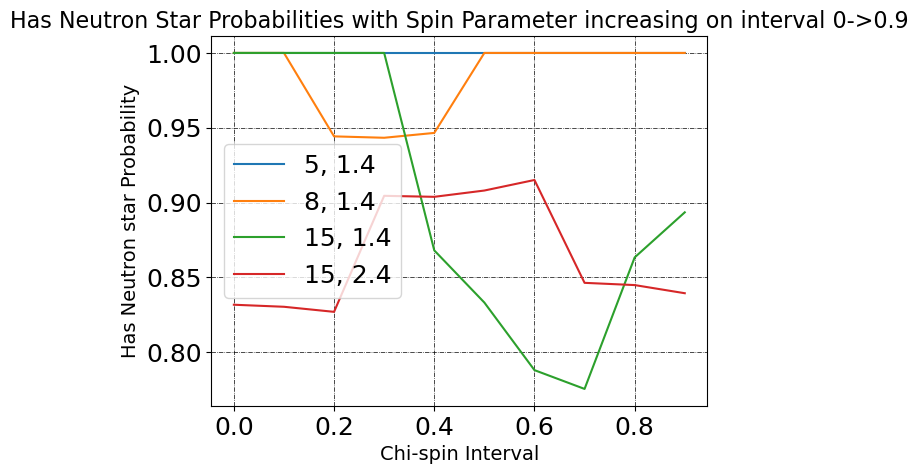

In [308]:
import matplotlib.pyplot as plt
chi, has_NS1 = has_NS(5, 1.4, 11) #print each of mass_gaps values
chi, has_NS2 = has_NS(8, 1.4, 11)
chi, has_NS3 = has_NS(15, 1.4, 11)
chi, has_NS4 = has_NS(15, 2.4, 11)

print(has_NS(5, 1.4, 11))
print(has_NS(8, 1.4, 11))
print(has_NS(15, 1.4, 11))
print(has_NS(15, 2.4, 11))

plt.plot(chi, has_NS1, label='5, 1.4')
plt.plot(chi, has_NS2, label='8, 1.4')
plt.plot(chi, has_NS3, label='15, 1.4')
plt.plot(chi, has_NS4, label='15, 2.4')
plt.title("Has Neutron Star Probabilities with Spin Parameter increasing on interval 0->0.9", fontsize=16)
plt.ylabel("Has Neutron star Probability", fontsize=14)
plt.xlabel("Chi-spin Interval", fontsize=14)
plt.grid(which='major', color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

In [17]:
def _get_mass_grid():
    """Get a grid over mass1, mass2. Used for parameter sweep."""
    mass1 = np.linspace(1, 20, 200)
    mass2 = np.linspace(1, 20, 200)
    t = Table(
        data=np.vstack(
            (np.repeat(mass1, mass2.size),
             np.tile(mass2, mass1.size))
        ).T, names=('mass1', 'mass2')
    )
    mask = t['mass1'] > t['mass2']
    t = t[mask]
    return t

In [18]:
mass1 = np.linspace(0, 50, 10)
mass2 = np.linspace(0, 10, 10)
print(mass1, mass2)

[ 0.          5.55555556 11.11111111 16.66666667 22.22222222 27.77777778
 33.33333333 38.88888889 44.44444444 50.        ] [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


In [19]:
mass1 = np.linspace(0, 50, 200)
mass2 = np.linspace(0, 10, 200)
print(mass1, mass2)

[ 0.          0.25125628  0.50251256  0.75376884  1.00502513  1.25628141
  1.50753769  1.75879397  2.01005025  2.26130653  2.51256281  2.7638191
  3.01507538  3.26633166  3.51758794  3.76884422  4.0201005   4.27135678
  4.52261307  4.77386935  5.02512563  5.27638191  5.52763819  5.77889447
  6.03015075  6.28140704  6.53266332  6.7839196   7.03517588  7.28643216
  7.53768844  7.78894472  8.04020101  8.29145729  8.54271357  8.79396985
  9.04522613  9.29648241  9.54773869  9.79899497 10.05025126 10.30150754
 10.55276382 10.8040201  11.05527638 11.30653266 11.55778894 11.80904523
 12.06030151 12.31155779 12.56281407 12.81407035 13.06532663 13.31658291
 13.5678392  13.81909548 14.07035176 14.32160804 14.57286432 14.8241206
 15.07537688 15.32663317 15.57788945 15.82914573 16.08040201 16.33165829
 16.58291457 16.83417085 17.08542714 17.33668342 17.5879397  17.83919598
 18.09045226 18.34170854 18.59296482 18.84422111 19.09547739 19.34673367
 19.59798995 19.84924623 20.10050251 20.35175879 20.6

In [20]:
def _get_mass_grid1(mass1, mass2):
    """Get a grid over mass1, mass2. Used for parameter sweep."""
    mass1 = np.linspace(0, 50, 10)
    mass2 = np.linspace(0, 10, 10)
    t = Table(
        data=np.vstack(
            (np.repeat(mass1, mass2.size),
             np.tile(mass2, mass1.size))
        ).T, names=('mass1', 'mass2')
    )
    mask = t['mass1'] > t['mass2']
    t = t[mask]
    return t

In [21]:
from astropy.table import Column, Table, vstack
_get_mass_grid1(5, 1.4)

mass1,mass2
float64,float64
5.555555555555555,0.0
5.555555555555555,1.1111111111111112
5.555555555555555,2.2222222222222223
5.555555555555555,3.3333333333333335
5.555555555555555,4.444444444444445
11.11111111111111,0.0
11.11111111111111,1.1111111111111112
11.11111111111111,2.2222222222222223
11.11111111111111,3.3333333333333335


[]

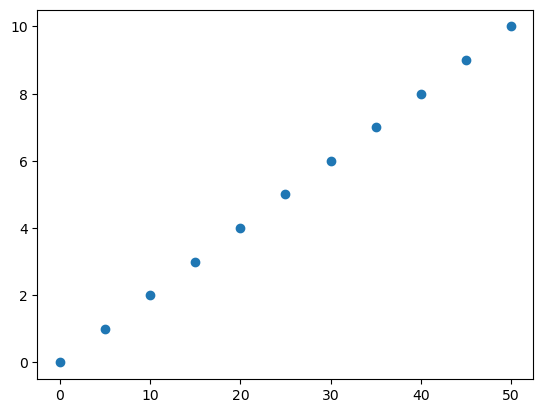

In [28]:
plt.scatter(m1s, m2s)
plt.plot()

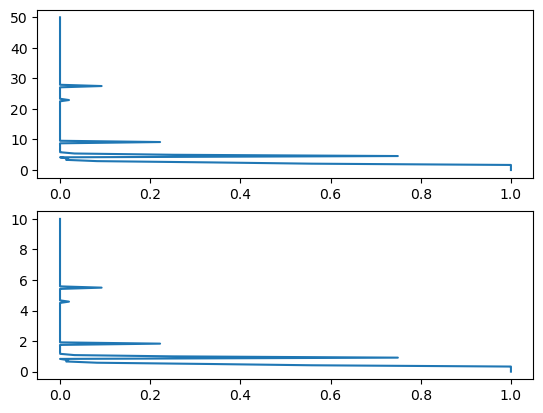

In [29]:
m1s = np.linspace(0,50,121)
m2s = np.linspace(0,10,121)
x = parameter_array
fig, ax = plt.subplots(2)
# Call plot() method on the appropriate object
ax[0].plot(x, m1s)
ax[1].plot(x, m2s)

In [318]:
#has mass_gap probabilities our goal is to observe the mass gap and iterate with varying mass
#scipy regression, when recoverying the mass we need to know the true value. the machine learning model will 
#perform best under training the probability of mass and finding a true value hopefully by the peak
parameter_array_mass_gap = []
m1s = np.linspace(0,50,200)
m2s = np.linspace(0,10,200)
for m1 in m1s:
    for m2 in m2s:
        parameter_array_mass_gap.append(em_bright.source_classification(m1, m2, 0, 0, 11)[2])
parameter_array_mass_gap = np.array(parameter_array_mass_gap)
print(m1s, m2s, parameter_array_mass_gap)
print(len(m1s))
print(len(m2s))
print(len(parameter_array_mass_gap))
print(np.shape(parameter_array_mass_gap))

[ 0.          0.25125628  0.50251256  0.75376884  1.00502513  1.25628141
  1.50753769  1.75879397  2.01005025  2.26130653  2.51256281  2.7638191
  3.01507538  3.26633166  3.51758794  3.76884422  4.0201005   4.27135678
  4.52261307  4.77386935  5.02512563  5.27638191  5.52763819  5.77889447
  6.03015075  6.28140704  6.53266332  6.7839196   7.03517588  7.28643216
  7.53768844  7.78894472  8.04020101  8.29145729  8.54271357  8.79396985
  9.04522613  9.29648241  9.54773869  9.79899497 10.05025126 10.30150754
 10.55276382 10.8040201  11.05527638 11.30653266 11.55778894 11.80904523
 12.06030151 12.31155779 12.56281407 12.81407035 13.06532663 13.31658291
 13.5678392  13.81909548 14.07035176 14.32160804 14.57286432 14.8241206
 15.07537688 15.32663317 15.57788945 15.82914573 16.08040201 16.33165829
 16.58291457 16.83417085 17.08542714 17.33668342 17.5879397  17.83919598
 18.09045226 18.34170854 18.59296482 18.84422111 19.09547739 19.34673367
 19.59798995 19.84924623 20.10050251 20.35175879 20.6

Text(0.5, 1.0, 'p(Has_Mass_gap) ')

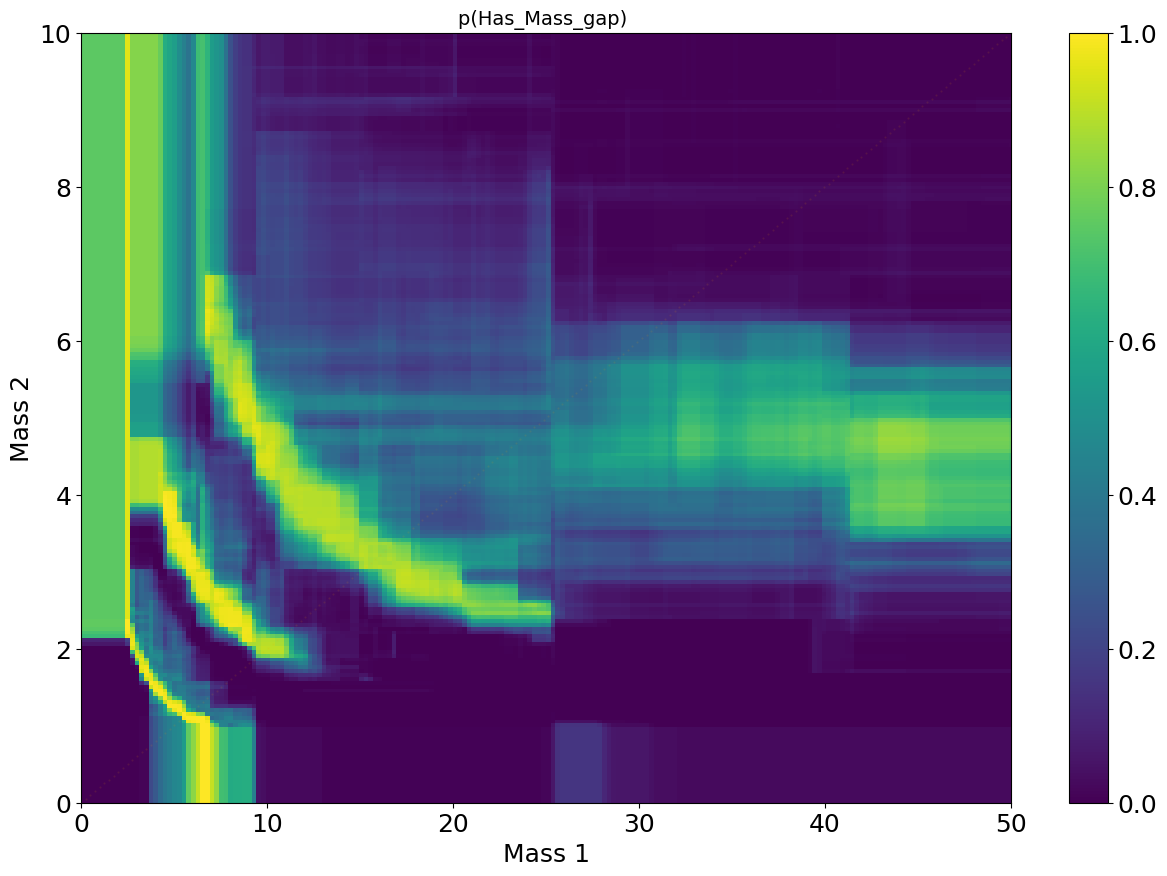

In [319]:
import pylab as pl

X, Y = np.meshgrid(m1s, m2s)
distribution = parameter_array_mass_gap.reshape(len(m1s), len(m2s))
fig = pl.figure(figsize=(15,10))
ax = fig.gca()
ax.set_xlim(0, 50)
ax.set_ylim(0, 10)
plt.pcolormesh(X, Y, distribution.T, shading='auto')
plt.colorbar()
plt.scatter(m1s, m2s, marker='.', c='orange', s=1, alpha=0.1)
ax.set_xlabel('Mass 1')
ax.set_ylabel('Mass 2')
ax.set_title('p(Has_Mass_gap) ', fontsize = 14)

In [296]:
em_bright.source_classification(1.4, 1.4, 0, 0, 12)
#has NS [0]
#has remnant [1]
#mass gap [2]

(1.0, 1.0, 0.0)

In [297]:
print(parameter_array_mass_gap)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.91584712e-02 7.48823144e-01 7.48823144e-01 7.48823144e-01
 7.48823144e-01 7.48823144e-01 7.48823144e-01 7.48823144e-01
 7.48823144e-01 7.48823144e-01 7.48823144e-01 7.48823144e-01
 7.48823144e-01 7.48823144e-01 7.48823144e-01 7.48823144e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.41121815e-01 4.92542427e-01 6.25710216e-02 1.92165911e-01
 8.56159405e-01 8.04516547e-01 5.34867880e-01 6.98156334e-01
 7.93237974e-01 7.93237974e-01 7.93237974e-01 7.93237974e-01
 7.93237974e-01 7.93237974e-01 7.93237974e-01 7.93237974e-01
 4.72049611e-01 4.72049611e-01 4.71923348e-01 4.11688029e-01
 2.65202169e-01 2.33650615e-02 9.05567297e-01 8.36333323e-01
 5.96935245e-01 3.85671013e-01 1.91773050e-01 3.79672615e-01
 4.87701623e-01 4.87701623e-01 4.87701623e-01 4.87701623e-01
 4.87701623e-01 4.87701623e-01 4.87701623e-01 4.87701623e-01
 6.82626984e-01 6.82626984e-01 4.12805949e-01 0.00000000e+00
 2.14735319e-01 9.534843

In [316]:
#has mass_gap probabilities our goal is to observe the mass gap and iterate with varying mass
#scipy regression, when recoverying the mass we need to know the true value. the machine learning model will 
#perform best under training the probability of mass and finding a true value hopefully by the peak
parameter_array_mass_gap = []
m1s = np.linspace(0,50,20)
m2s = np.linspace(0,10,20)
for m1 in m1s:
    for m2 in m2s:
        parameter_array_mass_gap.append(em_bright.source_classification(m1, m2, 0, 0, 11)[2])
parameter_array_mass_gap = np.array(parameter_array_mass_gap)
print(m1s, m2s, parameter_array_mass_gap)
print(len(m1s))
print(len(m2s))
print(len(parameter_array_mass_gap))
print(np.shape(parameter_array_mass_gap))

[ 0.          2.63157895  5.26315789  7.89473684 10.52631579 13.15789474
 15.78947368 18.42105263 21.05263158 23.68421053 26.31578947 28.94736842
 31.57894737 34.21052632 36.84210526 39.47368421 42.10526316 44.73684211
 47.36842105 50.        ] [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.91584712e-02 7.48823144e-01 7.48823144e-01 7.48823144e-01
 7.48823144e-01 7.48823144e-01 7.48823144e-01 7.48823144e-01
 7.48823144e-01 7.48823144e-01 7.48823144e-01 7.48823144e-01
 7.48823144e-01 7.48823144e-01 7.48823144e-01 7.48823144e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.41121815e-01 4.92542427e-01 6.25710216e-02 1.92165911e-01
 8.56159405e-01 8.04516547e-01 5.34867880e-01 6.98156334e-01
 7.93237974e-01 7.9323

Text(0.5, 1.0, 'p(Has_Mass_gap) ')

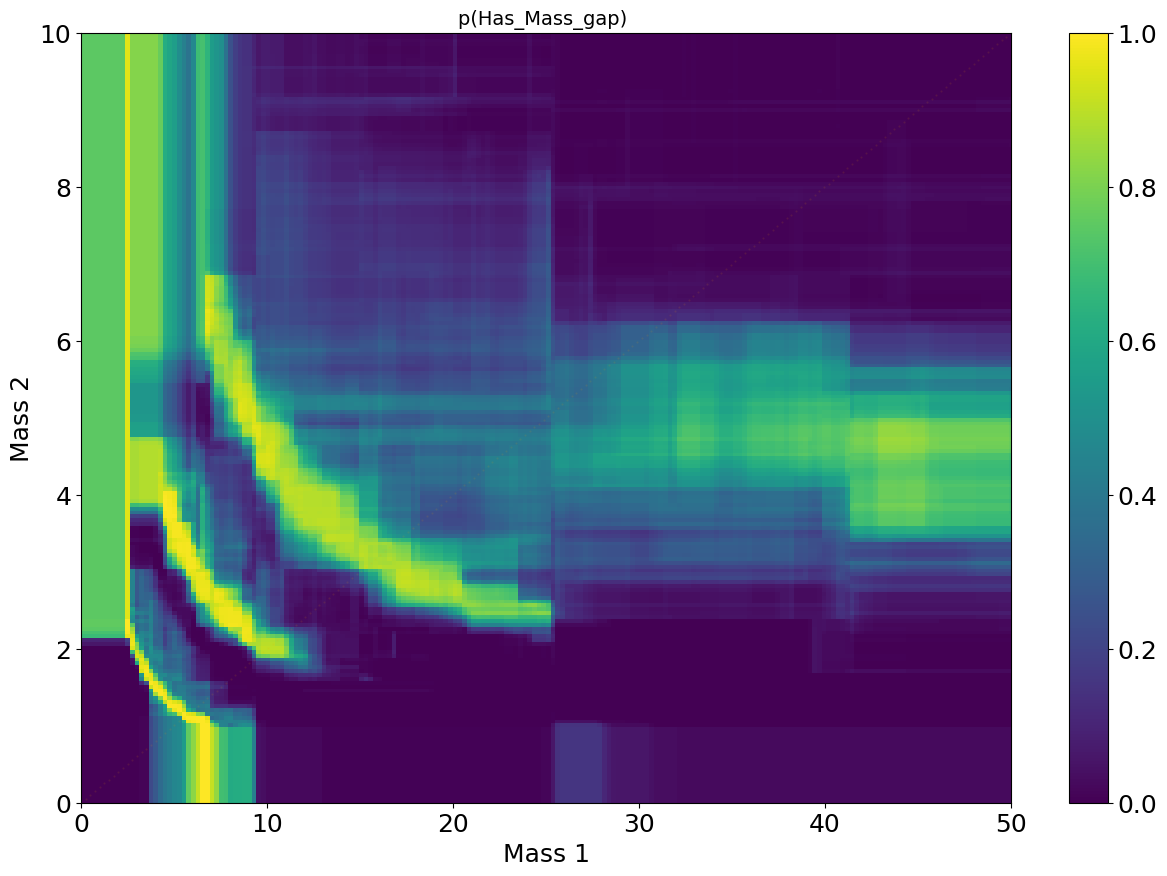

In [321]:
import pylab as pl

X, Y = np.meshgrid(m1s, m2s)
distribution = parameter_array_mass_gap.reshape(len(m1s), len(m2s))
fig = pl.figure(figsize=(15,10))
ax = fig.gca()
ax.set_xlim(0, 50)
ax.set_ylim(0, 10)
plt.pcolormesh(X, Y, distribution.T, shading='auto')
plt.colorbar()
plt.scatter(m1s, m2s, marker='.', c='orange', s=1, alpha=0.1)
ax.set_xlabel('Mass 1')
ax.set_ylabel('Mass 2')
ax.set_title('p(Has_Mass_gap) ', fontsize = 14)